In [16]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import nsepy as nse
from nsepy import get_history
import mplfinance as mpf

In [17]:
nifty=pd.read_csv('NIFTY200.csv')

In [18]:
symbol=nifty[['SYMBOL']]
nifty.columns


Index(['SYMBOL'], dtype='object')

In [19]:
nifty.shape

(200, 1)

In [20]:
nifty.info

<bound method DataFrame.info of          SYMBOL
0           ACC
1        AUBANK
2      AARTIIND
3    ABBOTINDIA
4      ADANIENT
..          ...
195      VOLTAS
196   WHIRLPOOL
197       WIPRO
198     YESBANK
199        ZEEL

[200 rows x 1 columns]>

In [21]:
mc = mpf.make_marketcolors(up='g',down='r',edge='black',volume='gray',ohlc='black')
s  = mpf.make_mpf_style(marketcolors=mc)

In [24]:
 rising_stock=get_history("TCS",start=datetime(2021,1,1),end=datetime(datetime.now().year,datetime.now().month,datetime.now().day))
 rising_stock.head()   

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2021-01-01,TCS,EQ,2862.75,2880.0,2940.00,2879.00,2932.00,2928.25,2913.52,2681440,7.812435e+14,88216,504010,0.1880
2021-01-04,TCS,EQ,2928.25,2950.0,3050.75,2940.95,3042.70,3039.45,2998.15,5113293,1.533041e+15,207562,1182335,0.2312
2021-01-05,TCS,EQ,3039.45,3039.6,3114.25,3039.60,3090.65,3093.00,3084.07,5801309,1.789163e+15,202735,1554550,0.2680
2021-01-06,TCS,EQ,3093.00,3100.0,3113.50,3037.20,3053.00,3051.50,3078.56,3726716,1.147294e+15,172084,1054841,0.2830
2021-01-07,TCS,EQ,3051.50,3075.0,3080.85,3000.25,3048.65,3032.80,3028.74,3717827,1.126032e+15,167700,1490971,0.4010


In [43]:
rising_stock.reset_index('Date',inplace=True)
rising_stock.columns


Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', '44_obs_for_SMA'],
      dtype='object')

In [56]:
rising_stock['Date'] = pd.to_datetime(rising_stock.Date)

In [57]:
type(rising_stock.Date)

pandas.core.series.Series

In [59]:

rising_stock

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,44_obs_for_SMA
0,2021-01-01,EMAMILTD,EQ,423.75,425.40,425.95,419.60,423.5,423.70,422.71,305184,1.290039e+13,6843,157281,0.5154,NaN
1,2021-01-04,EMAMILTD,EQ,423.70,425.65,435.00,420.60,424.5,425.40,427.73,969002,4.144701e+13,25599,467829,0.4828,NaN
2,2021-01-05,EMAMILTD,EQ,425.40,424.00,428.80,423.10,427.0,427.25,425.60,670554,2.853899e+13,40033,457704,0.6826,NaN
3,2021-01-06,EMAMILTD,EQ,427.25,428.00,454.55,426.70,451.5,450.30,438.78,2684476,1.177886e+14,69274,1415144,0.5272,NaN
4,2021-01-07,EMAMILTD,EQ,450.30,457.00,462.40,444.90,452.0,451.55,454.98,1435982,6.533483e+13,49206,824144,0.5739,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2021-05-26,EMAMILTD,EQ,499.85,510.00,510.70,495.65,504.0,504.25,504.24,655345,3.304533e+13,19285,321508,0.4906,498.779545
97,2021-05-27,EMAMILTD,EQ,504.25,504.00,510.00,499.00,500.0,502.40,504.83,551114,2.782195e+13,18755,419806,0.7617,499.476136
98,2021-05-28,EMAMILTD,EQ,502.40,506.50,506.90,499.60,504.5,503.35,504.22,267261,1.347572e+13,11284,178569,0.6681,499.884091
99,2021-05-31,EMAMILTD,EQ,503.35,506.50,506.50,499.95,501.8,501.10,502.60,216111,1.086176e+13,15512,155382,0.7190,500.369318


In [ ]:
# Get historical data of all Nifty50 stocks and filter out rising stocks
# calculating the simple moving average (which is just mean calculated progressively) 
# and add the result as a new column to dataframe

for index, row in nifty.iterrows():
    rising_stock=get_history(row["SYMBOL"],start=datetime(2021,1,1),end=datetime(datetime.now().year,datetime.now().month,datetime.now().day))
    if rising_stock.shape[0]>1 and rising_stock['Open'][-1] < rising_stock['Close'][-1]:
        SMA_window = 44
        rising_stock["44_obs_for_SMA"] = rising_stock["Close"].rolling(window=SMA_window).mean()

        if (rising_stock["High"][-1]>= rising_stock["44_obs_for_SMA"][-1] and rising_stock["Low"][-1]<= rising_stock["44_obs_for_SMA"][-1]) or abs(rising_stock["Low"][-1]-rising_stock["44_obs_for_SMA"][-1])<=2 :
            #rising_stock['Date'] = pd.to_datetime(rising_stock.Date, infer_datetime_format=True)
            #rising_stock.to_csv("stocks/{index}.csv".format(index=index))
            rising_stock.reset_index('Date',inplace=True)
            rising_stock['Date'] = pd.to_datetime(rising_stock.Date)
            rising_stock.set_index('Date',inplace=True)
            print(row["SYMBOL"])
            #print(rising_stock['Date'])
            #df=rising_stock[["Date","Symbol","Open","High","Low","Close"]]
            mpf.plot(rising_stock,type='candle',figratio=(38,15),mav=44,style=s)
                
            
    #print('{name}: {value}'.format(name=name, value=values))


In [8]:
data=pd.DataFrame(list,columns=["SYMBOL","Open","High","Low","Close","44_obs_for_SMA"])
data=data[["SYMBOL","Open","High","Low","Close","44_obs_for_SMA"]]
data.to_csv("stocks/rising_stocks.csv")

In [9]:
rising_stocks=pd.read_csv('stocks/rising_stocks.csv',index_col=0)

In [10]:
rising_stocks.columns

Index(['SYMBOL', 'Open', 'High', 'Low', 'Close', '44_obs_for_SMA'], dtype='object')

In [11]:
rising_stocks

,SYMBOL,Open,High,Low,Close,44_obs_for_SMA
0,EMAMILTD,502.9,514.90,502.05,507.5,501.136364
1,GODREJIND,524.0,537.95,520.35,527.4,528.927273


In [12]:
### and plot the graph with points where upturn happen

for index, row in rising_stocks.iterrows():
    if row["High"]>= row["44_obs_for_SMA"] and row["44_obs_for_SMA"] >=row["Low"] :
        #print(row["SYMBOL"])
        print("{symbol}    {high}       {low}         {sma} ".format(symbol=row["SYMBOL"],high=round(row["High"]),low=round(row["Low"]),sma=round(row["44_obs_for_SMA"])))

GODREJIND    538       520         529 


In [13]:
#rising_stock.dtypes

In [14]:
mc = mpf.make_marketcolors(up='g',down='r',
                           edge='black',
                           
                           volume='gray',
                           ohlc='black')
s  = mpf.make_mpf_style(marketcolors=mc)

EMAMILTD
Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', '44_obs_for_SMA'],
      dtype='object')


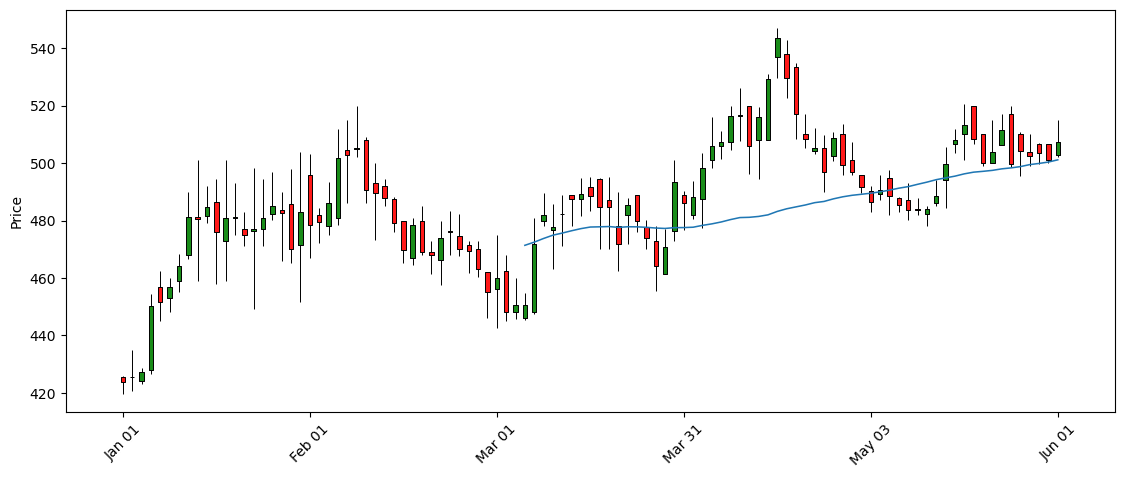

GODREJIND
Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', '44_obs_for_SMA'],
      dtype='object')


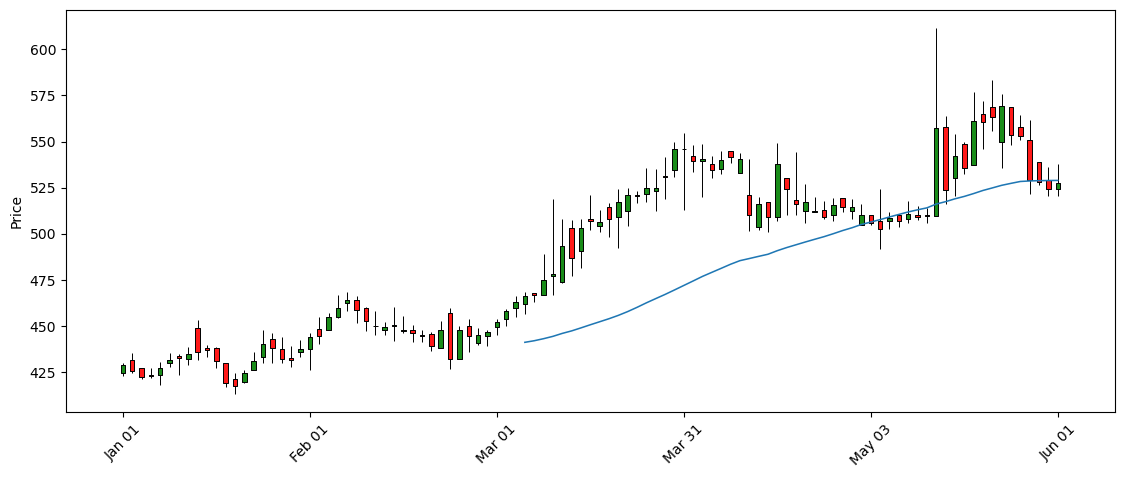

In [63]:
for index, row in rising_stocks.iterrows():
    stock = pd.read_csv('stocks/{symbol}.csv'.format(symbol=row["SYMBOL"]),index_col=0,parse_dates=True)
    #if (stock["High"][-1]>= stock["44_obs_for_SMA"][-1]) and (stock["Low"][-1]<= stock["44_obs_for_SMA"][-1]):
    print(row["SYMBOL"])
    print(stock.columns)

    mpf.plot(stock,type='candle',figratio=(38,15),mav=44,style=s)

In [18]:
import pathlib
import IPython.display as IPydisplay
#stock = pd.read_csv('stocks/TCS.csv',index_col=0,parse_dates=True)
for index, row in rising_stocks.iterrows():
    stock = pd.read_csv('stocks/{symbol}.csv'.format(symbol=row["SYMBOL"]),index_col=0,parse_dates=True)
    ourpath = pathlib.Path("img/{symbol}.png".format(symbol=row["SYMBOL"]))
    mpf.plot(stock, type='candle',figratio=(100,40), mav=44, savefig=ourpath,style=s)
    #IPydisplay.Image(ourpath)